# Import stuff

In [1]:
import os
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd

# Parameters

In [7]:
#dirs:
pre_proc_dir = 'pre_proc_data'
masks_dir = 'masks'

# file_format:
first_rest_session_format = '1_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz'
second_rest_session_format = '2_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz'

# R01 to IDCH mapping:
mapping_R01_to_IDCH = {'222': '101', '183': '102', '216': '103', '192': '104', '251': '105', '206': '106', '180': '107', '184': '108', '169': '109', '207': '110', '115': '112', '114': '113', '232': '114'}

# masks:
bi_putamen_mask = 'bilateral_putamen_mask.nii'
bi_SMA_mask = 'bilateral_SMA_mask.nii'
masks_to_apply = [bi_putamen_mask, bi_SMA_mask]

# regions to test connectivity between:
connectivity_regions = [['bilateral_putamen', 'bilateral_SMA'],]


# Create IDCH sub id folders and concatenate rs sessions

In [3]:
# get all directories in the root directory
r01_sub_dirs = os.listdir(pre_proc_dir)
r01_sub_dirs = [x for x in r01_sub_dirs if 'MBMFHab' in x]

for dir in r01_sub_dirs:
    sub_dir = os.path.join(pre_proc_dir, dir, 'func')
    
    # get sub R01 id:
    sub_R01_id = dir.split('Hab0')[1][:3]
    # get sub IDCH id:
    sub_IDCH_id = mapping_R01_to_IDCH[sub_R01_id]

    # create a new foler for the sub according to sub_IDCH_id:
    sub_IDCH_dir = os.path.join('sub-' + sub_IDCH_id)
    if not os.path.exists(sub_IDCH_dir):
        os.makedirs(sub_IDCH_dir)

    # get first rest session
    first_rest_session_file = [f for f in os.listdir(sub_dir) if first_rest_session_format in f][0]
    # get second rest session
    second_rest_session_file = [f for f in os.listdir(sub_dir) if second_rest_session_format in f][0]

    # concatenate session using fslmerge:
    # fslmerge -t <output_file> <input_files>
    if not os.path.exists(os.path.join(sub_IDCH_dir, f"sub-{sub_IDCH_id}_IDCH_id_rs_concat.nii.gz")):
        print(f'merging data for sub-{sub_IDCH_id} (R01: {sub_R01_id})')
        os.system(f'fslmerge -t {os.path.join(sub_IDCH_dir, f"sub-{sub_IDCH_id}_IDCH_id_rs_concat.nii.gz")} {os.path.join(sub_dir, first_rest_session_file)} {os.path.join(sub_dir, second_rest_session_file)}')


# Extract time series using masks (directly from the data)

In [6]:
# get all directories in the root directory
IDCH_sub_dirs = [x for x in os.listdir() if 'sub-' in x]

# apply masks:
for sub_dir in IDCH_sub_dirs:
    # get subID:
    sub_ID = sub_dir.split('-')[1]
    for mask in masks_to_apply:
        mask_name = mask.split('_mask')[0]
        if not os.path.exists(os.path.join(sub_dir, f"sub-{sub_ID}_IDCH_{mask_name}_time_series.txt")):
            print(f'>> Extracting time series for sub-{sub_ID} using {mask}')
            # fslmeants -i <input_file> -o <output_file> -m <mask_file>
            os.system(f'fslmeants -i {os.path.join(sub_dir, f"sub-{sub_ID}_IDCH_id_rs_concat.nii.gz")} -o {os.path.join(sub_dir, f"sub-{sub_ID}_IDCH_{mask_name}_time_series.txt")} -m {os.path.join(masks_dir, mask)}')


>> Extracting time series for sub-108 using bilateral_SMA_mask.nii
>> Extracting time series for sub-101 using bilateral_putamen_mask.nii
>> Extracting time series for sub-101 using bilateral_SMA_mask.nii
>> Extracting time series for sub-106 using bilateral_putamen_mask.nii
>> Extracting time series for sub-106 using bilateral_SMA_mask.nii
>> Extracting time series for sub-107 using bilateral_putamen_mask.nii
>> Extracting time series for sub-107 using bilateral_SMA_mask.nii
>> Extracting time series for sub-109 using bilateral_putamen_mask.nii
>> Extracting time series for sub-109 using bilateral_SMA_mask.nii
>> Extracting time series for sub-113 using bilateral_putamen_mask.nii


# Plot each subject's timeseries data

In [37]:
region_connectivity_df.z_score

0     1.067868
1     0.927699
2     1.066391
3     0.692112
4     0.750331
5     0.495967
6     0.948925
7     1.089419
8     0.721885
9    -0.511324
10    0.107319
11   -0.637397
Name: z_score, dtype: float64

Analyzing connectivity between bilateral_putamen and bilateral_SMA
Analyzing subject 101
Subject 101: correlation between bilateral_putamen and bilateral_SMA: r=0.788656499111702, p=2.497484879456922e-255; z score=1.0678676408990821


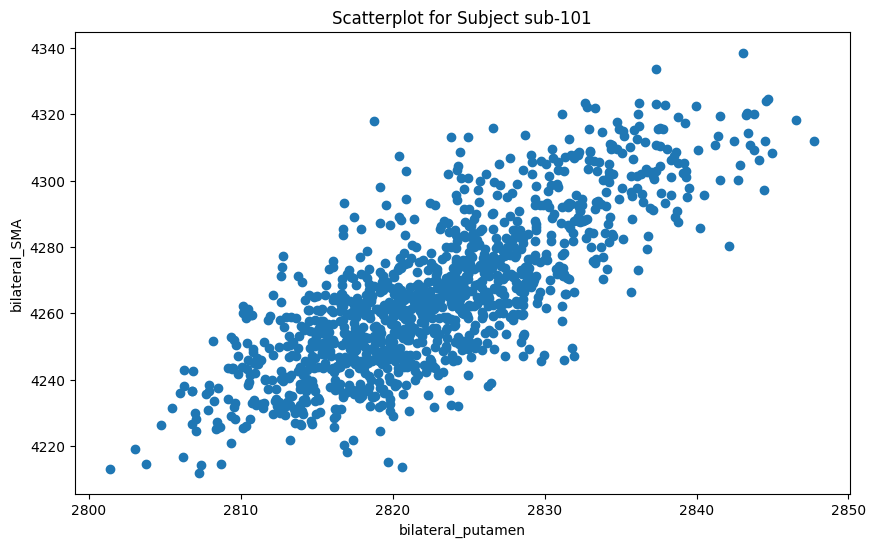

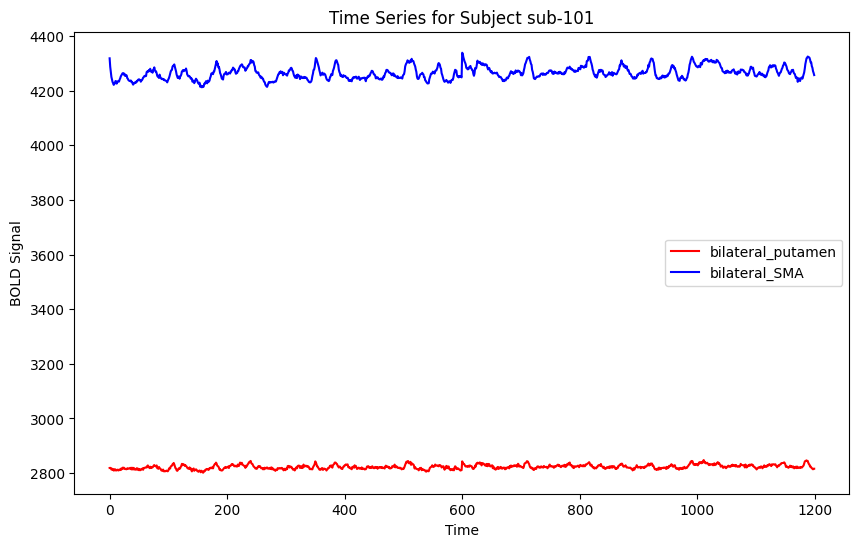

Analyzing subject 102
Subject 102: correlation between bilateral_putamen and bilateral_SMA: r=0.7295190623945976, p=7.352154042644721e-200; z score=0.9276985126917805


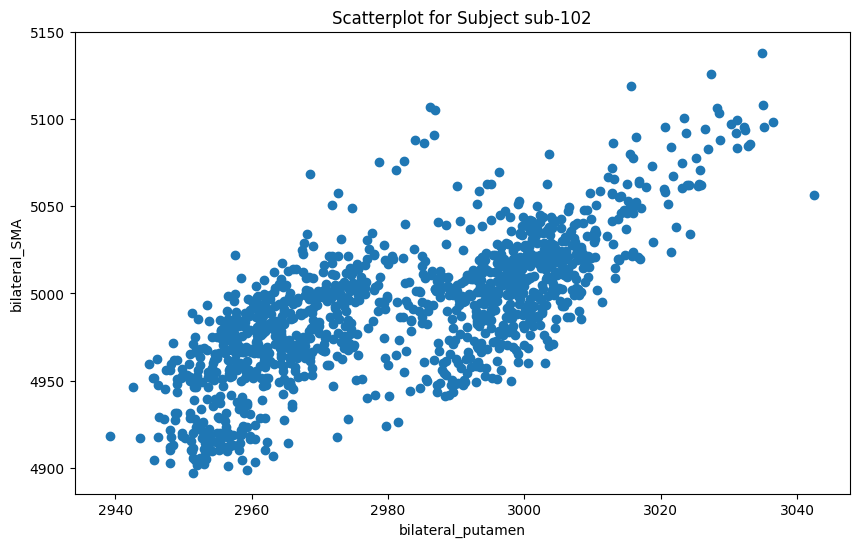

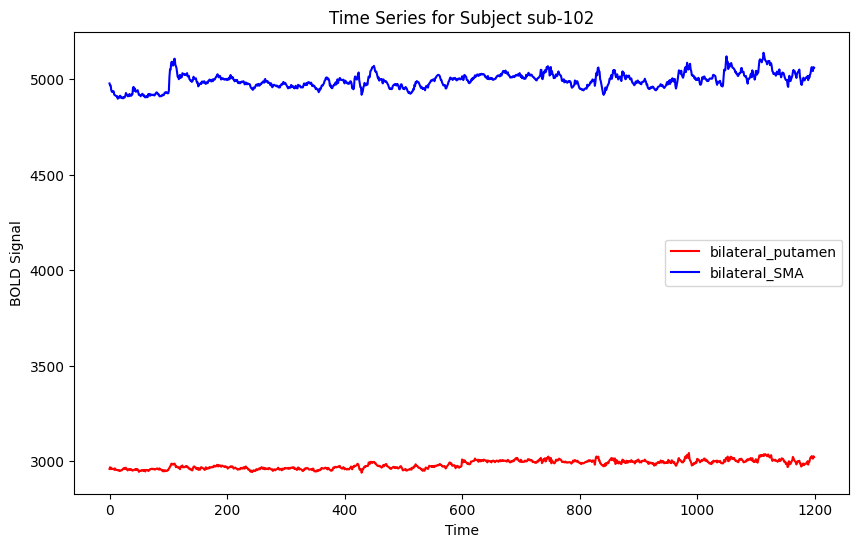

Analyzing subject 103
Subject 103: correlation between bilateral_putamen and bilateral_SMA: r=0.7880975941343307, p=1.008224519222043e-254; z score=1.066390859052362


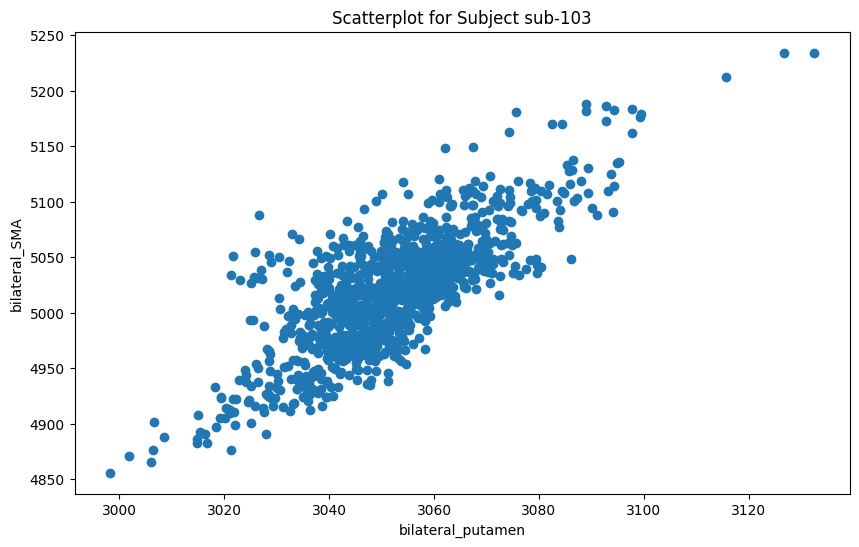

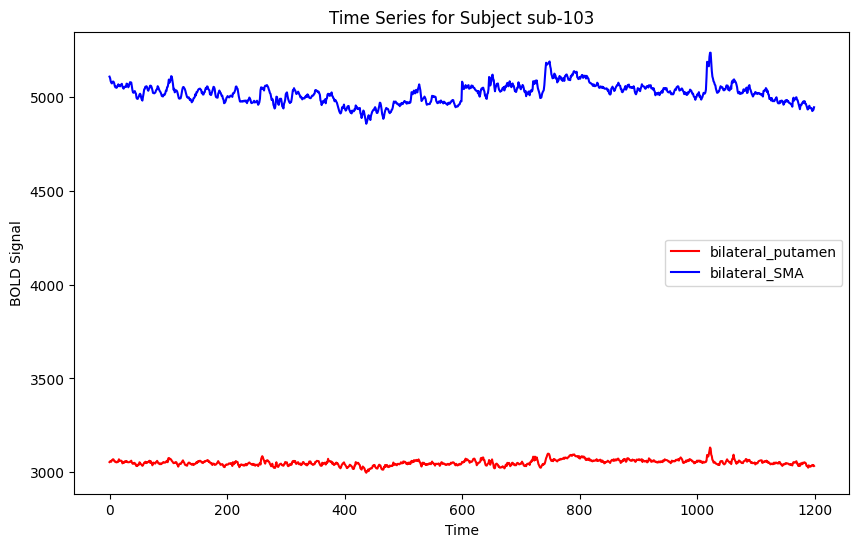

Analyzing subject 104
Subject 104: correlation between bilateral_putamen and bilateral_SMA: r=0.5993373388702045, p=6.441042713728052e-118; z score=0.6921124150178107


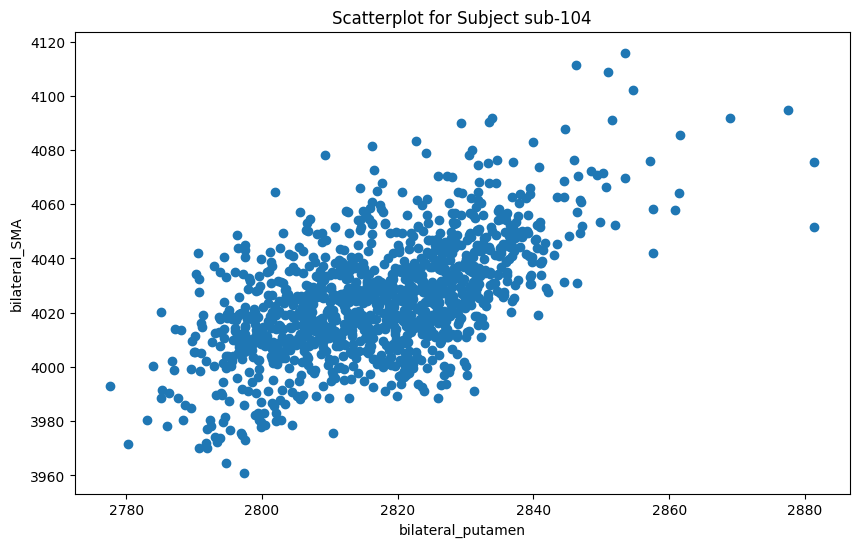

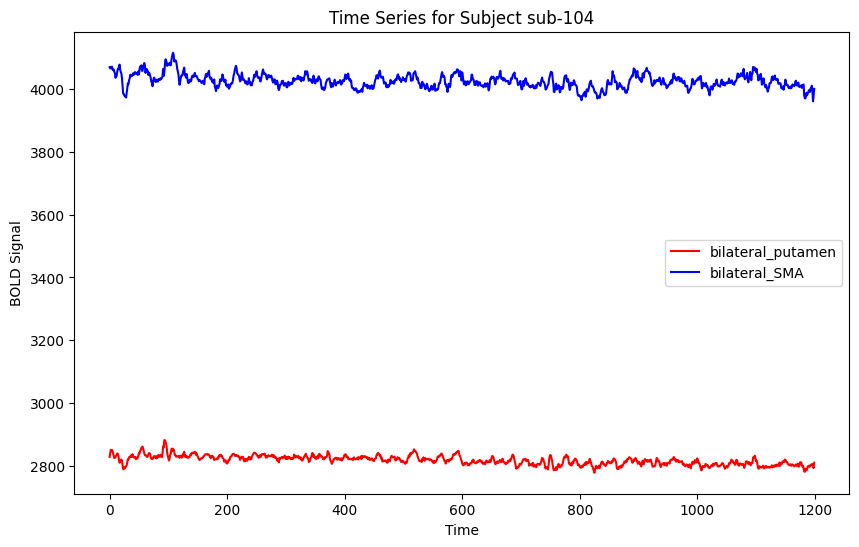

Analyzing subject 105
Subject 105: correlation between bilateral_putamen and bilateral_SMA: r=0.6353463101340568, p=1.1961781119895384e-136; z score=0.7503308815391699


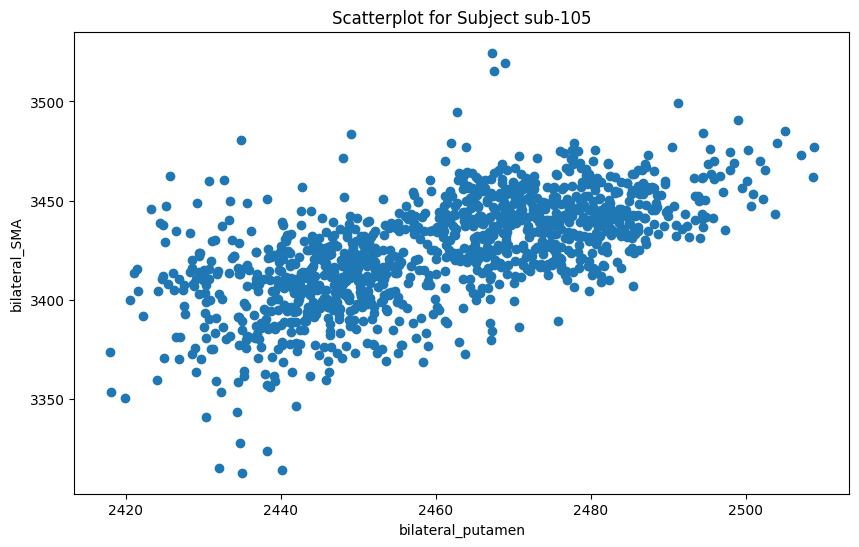

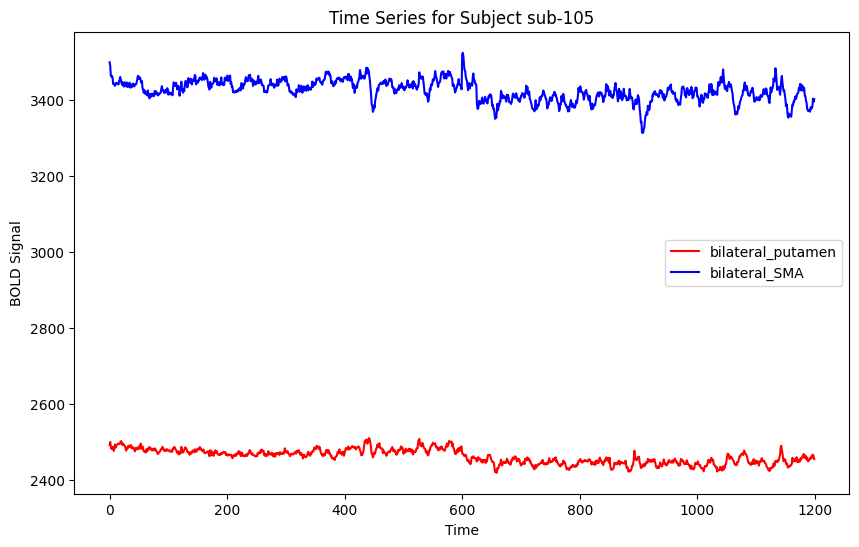

Analyzing subject 106
Subject 106: correlation between bilateral_putamen and bilateral_SMA: r=0.4589395329125254, p=1.4862569160955912e-63; z score=0.4959670308776539


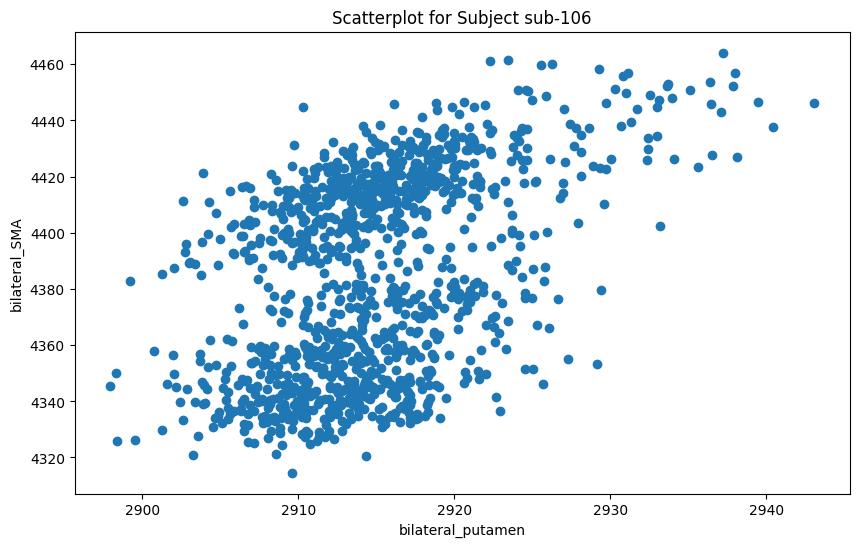

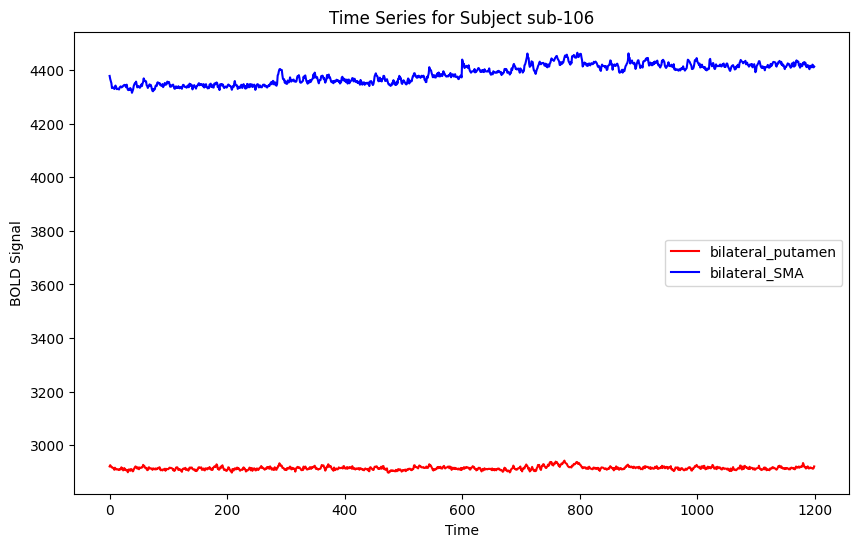

Analyzing subject 107
Subject 107: correlation between bilateral_putamen and bilateral_SMA: r=0.7392958685594592, p=5.620940613695051e-208; z score=0.9489247343805389


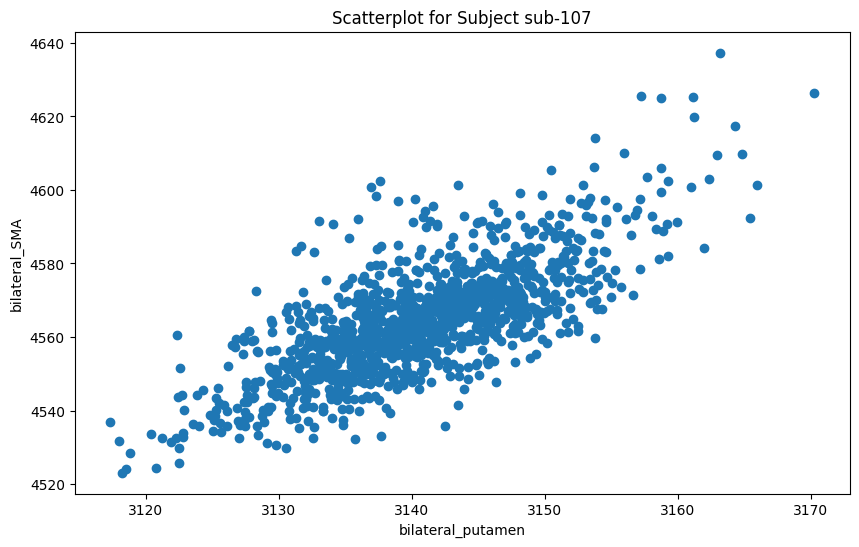

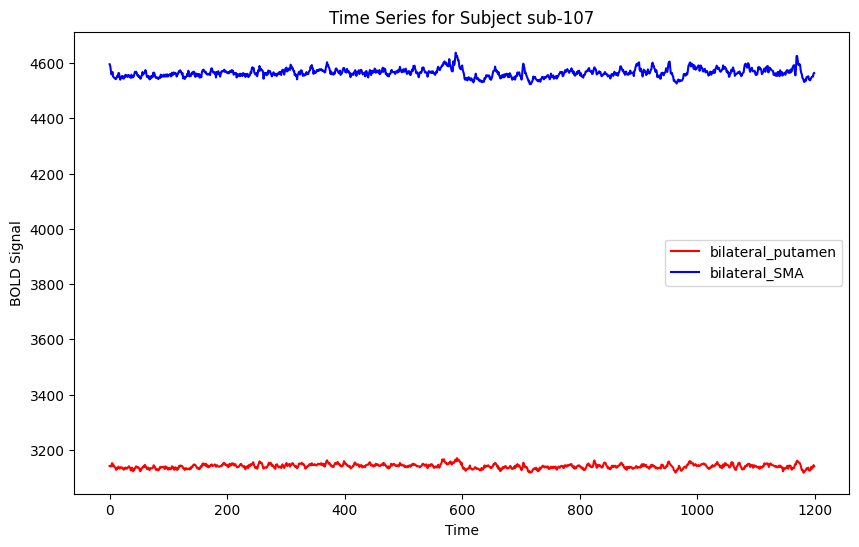

Analyzing subject 108
Subject 108: correlation between bilateral_putamen and bilateral_SMA: r=0.7966659668605445, p=3.1982252628388e-264; z score=1.0894189377847996


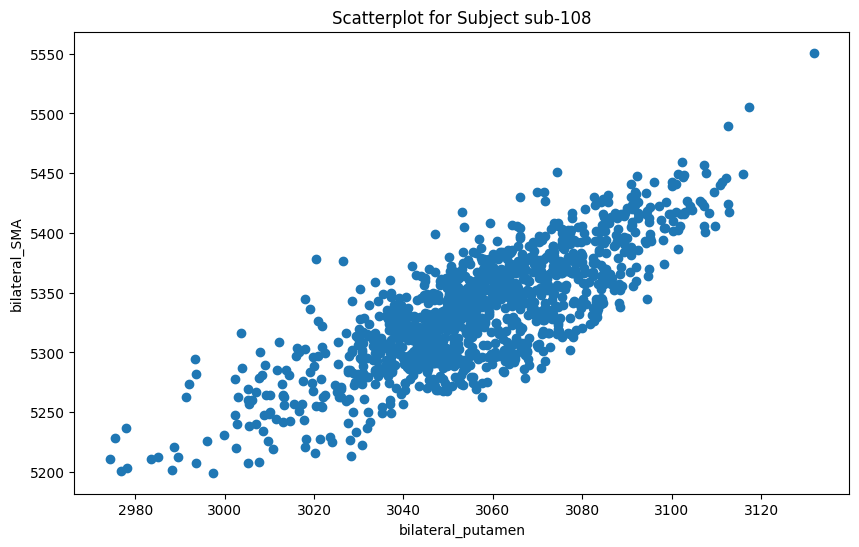

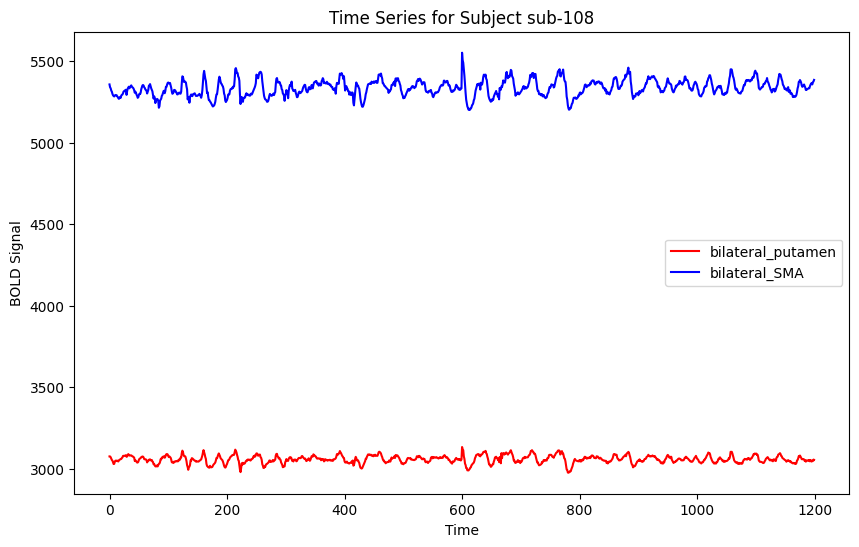

Analyzing subject 109
Subject 109: correlation between bilateral_putamen and bilateral_SMA: r=0.6180753631582776, p=2.322049595415291e-127; z score=0.7218846855584655


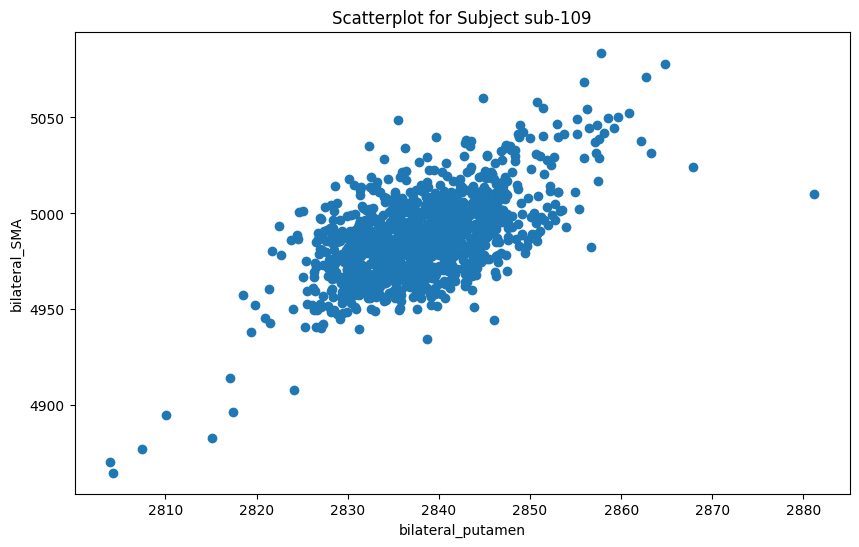

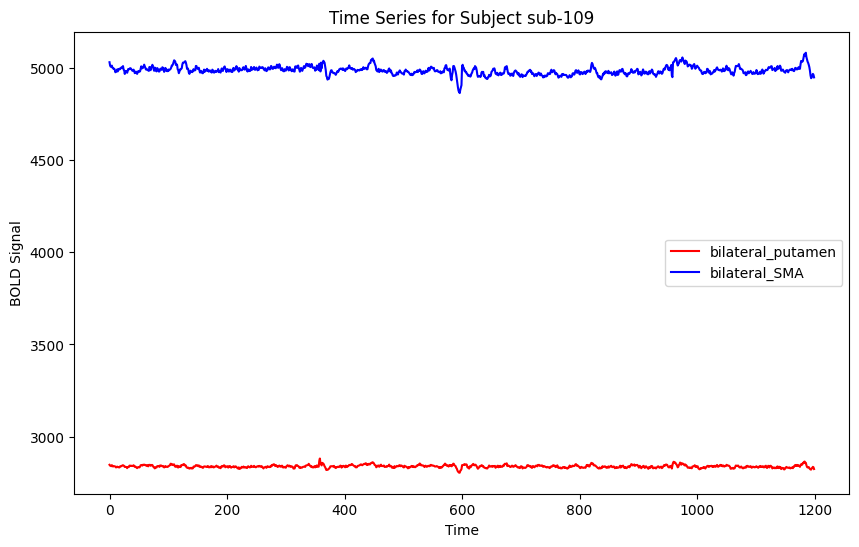

Analyzing subject 110
Subject 110: correlation between bilateral_putamen and bilateral_SMA: r=-0.4709765081047662, p=2.790598999376975e-67; z score=-0.5113244557324693


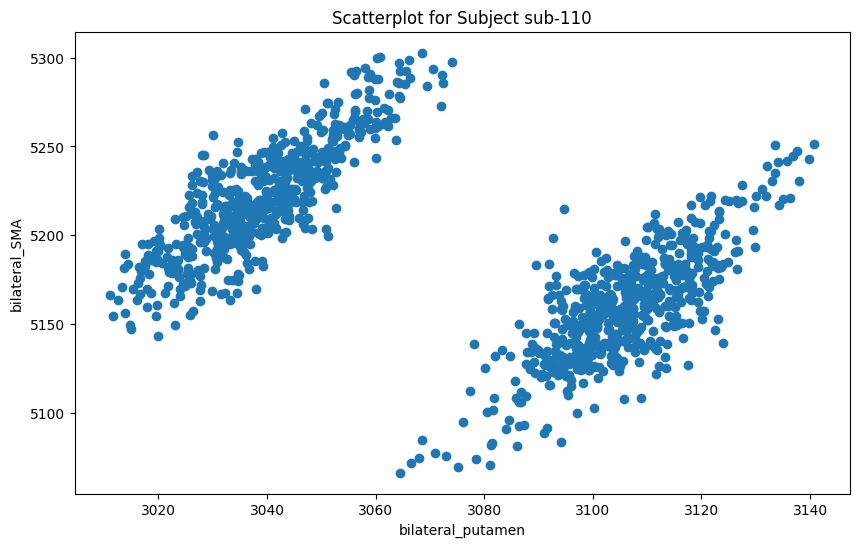

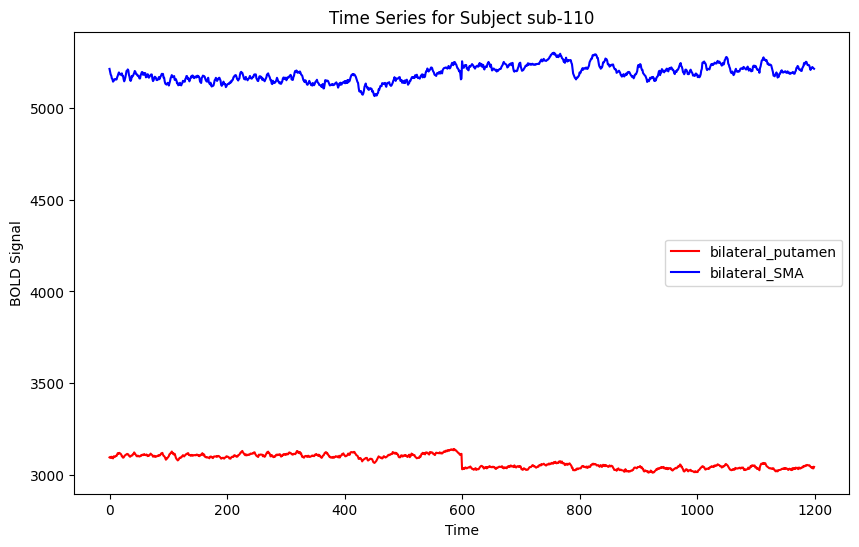

Analyzing subject 112
Subject 112: correlation between bilateral_putamen and bilateral_SMA: r=0.1069090045759325, p=0.00020708349813063938; z score=0.10731912752595607


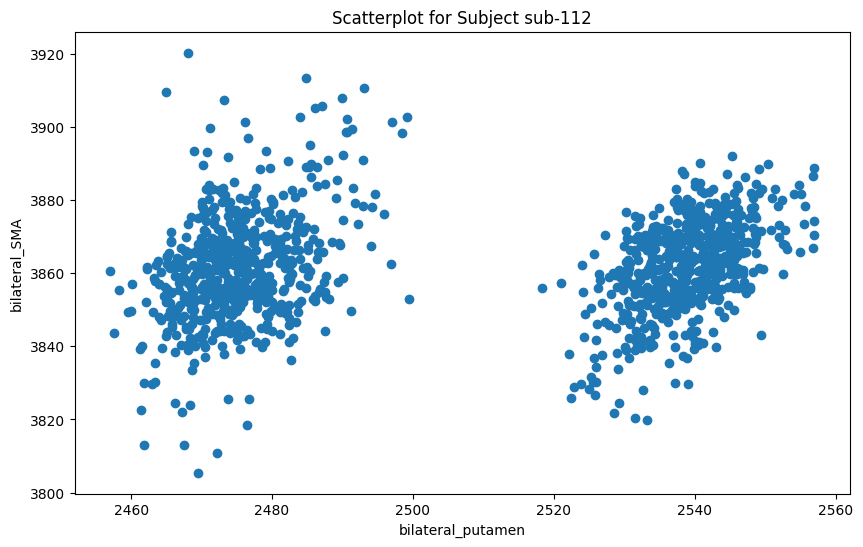

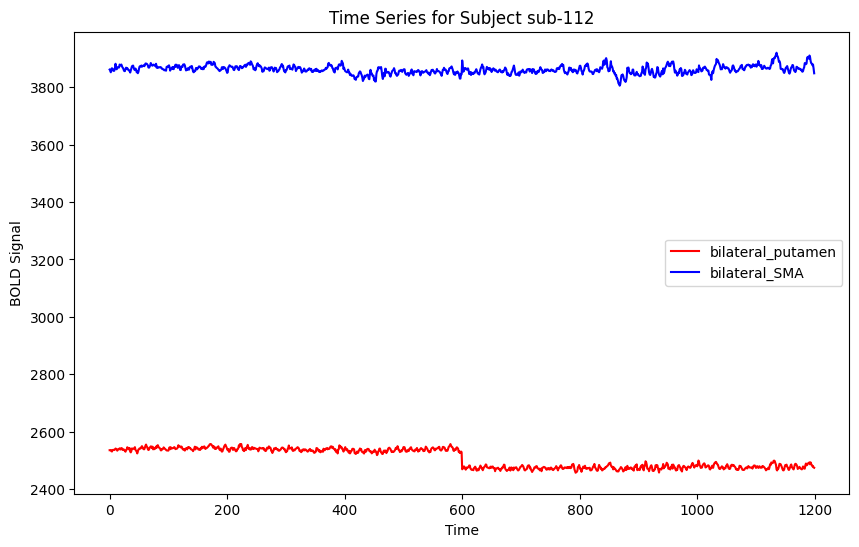

Analyzing subject 113
Subject 113: correlation between bilateral_putamen and bilateral_SMA: r=-0.5631243101698317, p=2.4418961564431476e-101; z score=-0.6373965841598883


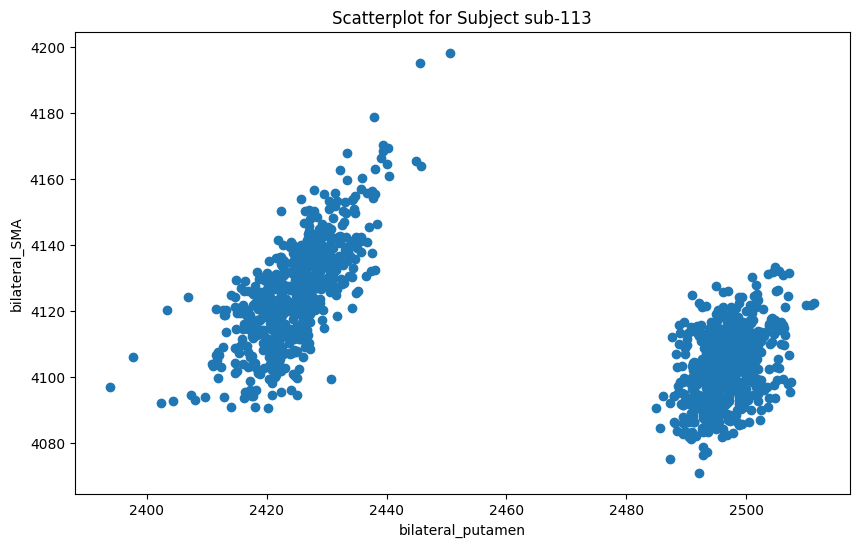

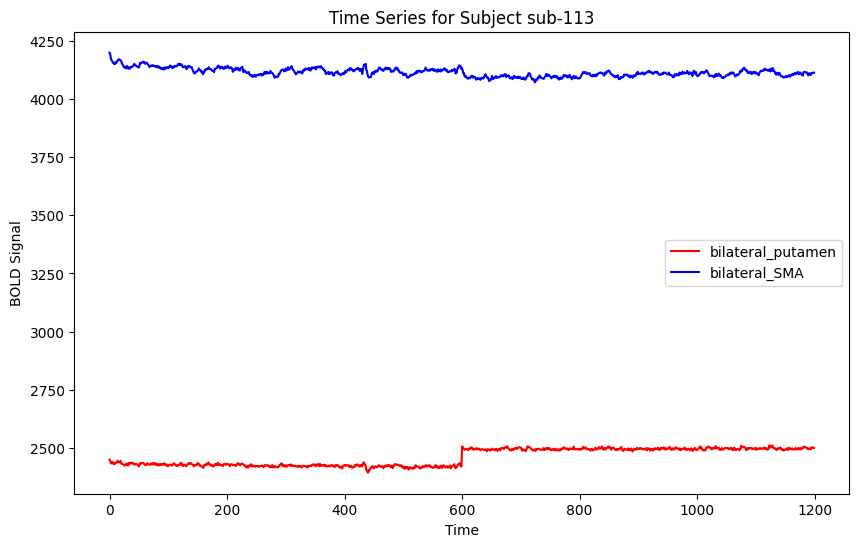

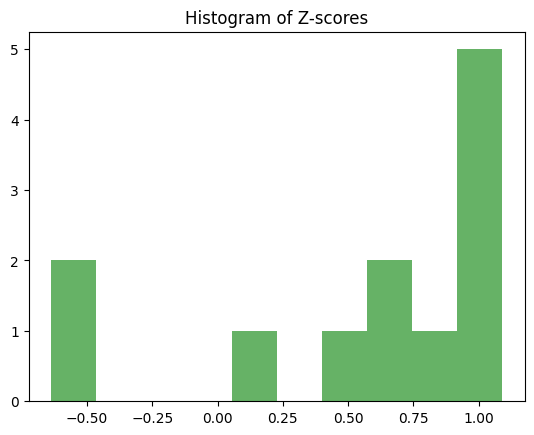

,subID,corr,p_val,z_score
0,101,0.788656,2.497485e-255,1.067868
1,102,0.729519,7.352154e-200,0.927699
2,103,0.788098,1.008225e-254,1.066391
3,104,0.599337,6.441043e-118,0.692112
4,105,0.635346,1.196178e-136,0.750331
5,106,0.458940,1.486257e-63,0.495967
6,107,0.739296,5.620941e-208,0.948925
7,108,0.796666,3.198225e-264,1.089419
8,109,0.618075,2.322050e-127,0.721885
9,110,-0.470977,2.790599e-67,-0.511324


,subID,bilateral_putamen_bilateral_SMA
0,101,1.067868
1,102,0.927699
2,103,1.066391
3,104,0.692112
4,105,0.750331
5,106,0.495967
6,107,0.948925
7,108,1.089419
8,109,0.721885
9,110,-0.511324


In [47]:
# get sub dirs:
IDCH_sub_dirs = [x for x in os.listdir() if 'sub-' in x]
# sort the sub dirs:
IDCH_sub_dirs.sort()

# List to collect data for DataFrame
per_region_data = {}

# Loop over the subject directories in the root directory
for region_pair in connectivity_regions:
    print(f"Analyzing connectivity between {region_pair[0]} and {region_pair[1]}")
    region_df = []
    for subject_dir in IDCH_sub_dirs:
        sub_ID = subject_dir.split('-')[1]
        print(f"Analyzing subject {sub_ID}")

        # Get the data for both regions:
        reg1_dir = os.path.join(subject_dir, f'sub-{sub_ID}_IDCH_{region_pair[0]}_time_series.txt')
        reg2_dir = os.path.join(subject_dir, f'sub-{sub_ID}_IDCH_{region_pair[1]}_time_series.txt')
        reg1_ts_data = np.loadtxt(reg1_dir)
        reg2_ts_data = np.loadtxt(reg2_dir)

        # Calculate the Pearson correlation between the time series
        correlation, p_val = pearsonr(reg1_ts_data, reg2_ts_data)
        # Calculate the Fisher z-score
        z_score = 0.5 * np.log((1 + correlation) / (1 - correlation))

        # Print correlation for the subject
        print(f"Subject {sub_ID}: correlation between {region_pair[0]} and {region_pair[1]}: r={correlation}, p={p_val}; z score={z_score}")
        # Scatterplot
        plt.figure(figsize=(10, 6))
        plt.scatter(reg1_ts_data, reg2_ts_data)
        plt.title(f'Scatterplot for Subject {subject_dir}')
        plt.xlabel(region_pair[0])
        plt.ylabel(region_pair[1])
        plt.show()
        #Line Plot for the Time-Series Data
        plt.figure(figsize=(10, 6))
        plt.plot(reg1_ts_data, color='red', label=region_pair[0])
        plt.plot(reg2_ts_data, color='blue', label=region_pair[1])
        plt.title(f'Time Series for Subject {subject_dir}')
        plt.xlabel('Time')
        plt.ylabel('BOLD Signal')
        plt.legend()
        plt.show()

        #Append the data to list
        region_df.append({"subID": sub_ID, "corr": correlation, "p_val": p_val, "z_score": z_score})

    # keep data
    region_connectivity_df = pd.DataFrame(region_df)
    per_region_data[region_pair[0] + "_" + region_pair[1]] = region_connectivity_df

    # Plot the histogram of the Z-scores
    plt.hist(region_connectivity_df.z_score, alpha=0.6, color='g')
    plt.title("Histogram of Z-scores")
    plt.show()

    display(region_connectivity_df)


# create a data frame that has only the connectivity score (z-score) for each region pair (and the subject ID):\
connectivity_df = pd.DataFrame(columns=['subID'])
for key in per_region_data.keys():
    connectivity_score = per_region_data[key][['subID', 'z_score']]
    connectivity_score = connectivity_score.rename(columns={'z_score': key})
    connectivity_df = pd.merge(connectivity_df, connectivity_score, on='subID', how='outer')
display(connectivity_df)